In [14]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from Lab3Functions import get_power, get_bursts, import_data


Zusätzliche Funktionen


In [16]:
def butter_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Function to rectify the EMG signal
def rectify_signal(data):
    return np.abs(data)

# Function to apply low-pass filter for envelope detection
def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    low = cutoff / nyquist
    b, a = butter(order, low, btype='low')
    envelope = filtfilt(b, a, data)
    return envelope


Hauptprogramm

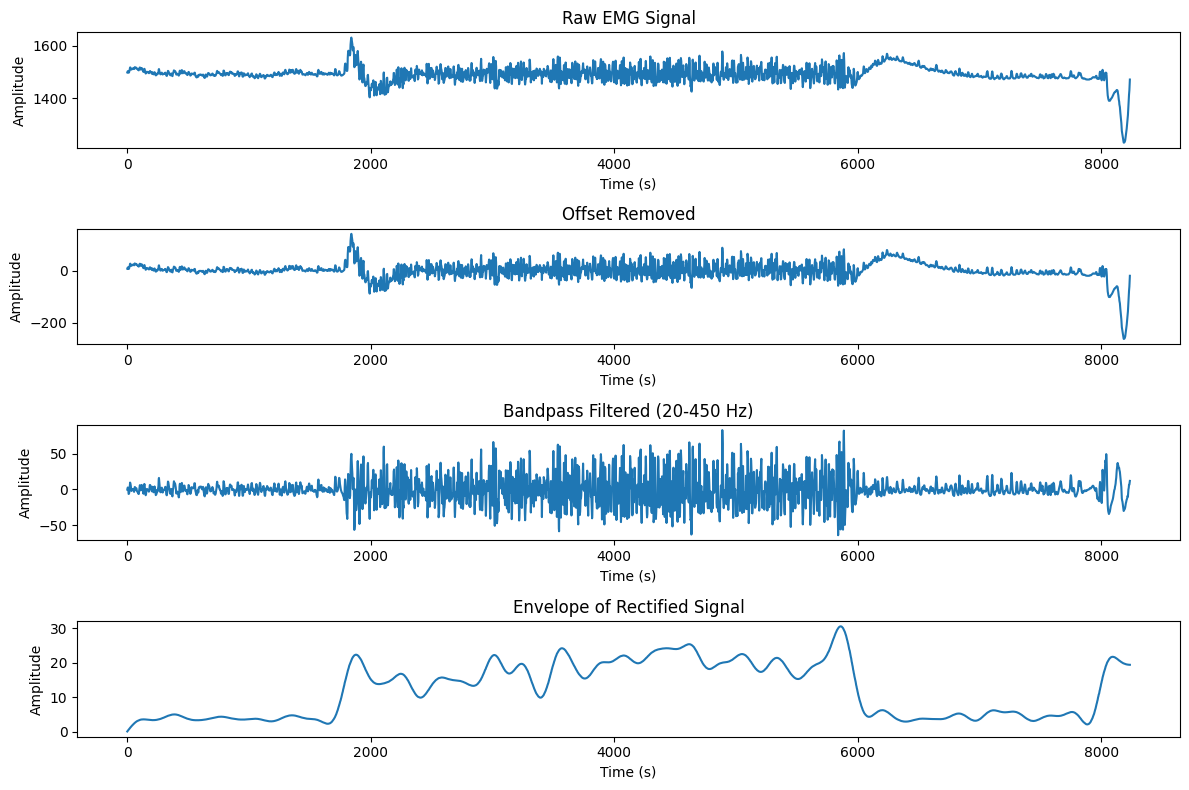

In [18]:
# Jupyter Notebook Main Function
def process_emg(file_name, separator, sampling_frequency, lowcut, highcut, envelope_cutoff):
    # Import data
    data = pd.read_csv(file_name, sep=separator)
    emg_raw = data['emg'].values
    time = data['time'].values

    # Step (a): Remove offset
    offset = np.mean(emg_raw)
    emg_offset_removed = emg_raw - offset

    # Step (b): Bandpass filter the signal
    emg_filtered = butter_filter(emg_offset_removed, lowcut, highcut, sampling_frequency)

    # Step (c): Rectify the signal
    emg_rectified = rectify_signal(emg_filtered)

    # Step (d): Apply low-pass filter to extract envelope
    emg_envelope = lowpass_filter(emg_rectified, envelope_cutoff, sampling_frequency)

    # Plot the results
    fig, axs = plt.subplots(4, 1, figsize=(12, 8))

    axs[0].plot(time, emg_raw)
    axs[0].set_title('Raw EMG Signal')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Amplitude')

    axs[1].plot(time, emg_offset_removed)
    axs[1].set_title('Offset Removed')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Amplitude')

    axs[2].plot(time, emg_filtered)
    axs[2].set_title('Bandpass Filtered (20-450 Hz)')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Amplitude')

    axs[3].plot(time, emg_envelope)
    axs[3].set_title('Envelope of Rectified Signal')
    axs[3].set_xlabel('Time (s)')
    axs[3].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Example usage for Jupyter Notebook
file_name = 'Feli2.csv'  # Update this with your file path
separator = ';'          # Separator used in the CSV file
sampling_frequency = 1000  # Hz
lowcut = 20  # Hz
highcut = 450  # Hz
envelope_cutoff = 10  # Hz



process_emg(file_name, separator, sampling_frequency, lowcut, highcut, envelope_cutoff)
